Import needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### Polynomial Regression

This class simulates regression. It gets a set of (x, y) data points and finds coefficients of polynomial which fits those points with minmum MSE.
We can add regualrization to model to prevent overfitting for higher degrees of polynomial.

Prediction:
$$y_{pred} = X \times W$$

Error Calculation:
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y_{i}})$$

Regularization:
$$regularization = \gamma\sum_{i=0}^{n}w_{i}^{2}$$

Gradient:
$$\Delta J=\frac{1}{n}X^{T}.(\hat{Y}-Y)$$

Weight Update:
$$W = W -\lambda\times J(W)$$

In [10]:
class PolynomialRegression:

    def __init__(self, x, y, lr=0.001, n=3, rgulr=0.1, max_epochs=10000):
        self.X_data = x
        self.Y_data = y
        self.learning_rate = lr
        self.degree = n
        self.max_epochs = max_epochs
        self.regularization = rgulr
        self.X_train = None
        self.Y_train = None
        self.X_test = None
        self.Y_test = None
        self.train_polynomials = None
        self.test_polynomials = None
        self.weights =  np.array([0 for _ in range(self.degree+1)], dtype=float)    # initialize the weights or polynomials coefs


    # split the data to test and train sets
    def data_split(self, test_size=0.1):
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X_data, self.Y_data, test_size=test_size, random_state=21)


    # calculate the mean square error of the predicted data
    def loss_function(self, true, pred):
        ridge_reg = self.regularization * np.sum(self.weights[1:] ** 2)   # regularization term
        mse = np.mean((true - pred) ** 2) + ridge_reg
        return mse


    # train network to set the weights
    def train(self):
        # find and save the polynomial values for n degrees to prevent redundant calculations
        self.train_polynomials = self.polynomialize(self.X_train)
        self.test_polynomials = self.polynomialize(self.X_test)

        # train for n epochs
        for epoch in range(self.max_epochs):
            # predict y
            Y_train_pred = np.dot(self.train_polynomials, self.weights)

            # calculate loss
            loss = self.loss_function(self.Y_train, Y_train_pred)
            
            # calculate gradients
            gradient = np.transpose(self.train_polynomials).dot((Y_train_pred - self.Y_train)/len(self.Y_train))

            # add regularization to gradient (exclude bias)
            gradient[1:] += (2 * self.regularization * self.weights[1:]) / len(self.Y_train)

            # update weights
            self.weights -= self.learning_rate * gradient
            
            # explain summary in each 1000 epochs
            # if epoch % 1000 == 0:
            #     self.summary(epoch, loss)
            if epoch == self.max_epochs - 1:
                self.summary(epoch, loss, flag=True)


    # explain the summary of the model
    def summary(self, e_no, loss, flag=False):
        # check the model for test data
        Y_test_pred = np.dot(self.test_polynomials, self.weights)
        test_loss = self.loss_function(self.Y_test, Y_test_pred)
        print(f'Epoch {e_no+1}: Training loss = {loss:.4f}, Test loss = {test_loss:.4f}')

        if flag:
            self.show_poly()


    # find the polynoimal values of degree n
    def polynomialize(self, data):
        X = np.zeros((len(data), self.degree+1))
        for d in range(0, self.degree + 1):
            X[:, d ] = data ** d
        return X
    
    # show the predicted polynomial's curve
    def show_poly(self):
        coefs = self.weights[::-1]
        x_values = [i for i in range(41)] 

        # calculate y values based on the polynomial equation
        y_values = np.polyval(coefs, x_values)

        # plot the polynomial curve
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X_data, self.Y_data, color='blue', s=1, label='points')
        plt.plot(x_values, y_values, color='orange', label='Polynomial curve')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)
        plt.show()



### Main

Original data points

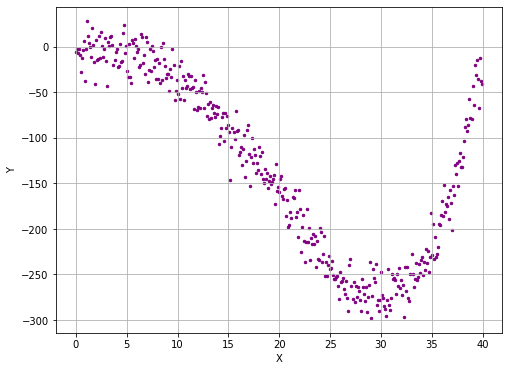

In [7]:
address = "dataset/Q2_Final.csv"
df = pd.read_csv(address)
X = df['X'].values
Y = df['Y'].values

# plot the points
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='purple', s=6, label='points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

### Train the model for different values of polynomial's degree

polynomial of degree 1

Training loss = 4416

Epoch 1: Training loss = 27939.7022, Test loss = 18881.8008
Epoch 1001: Training loss = 4419.6210, Test loss = 3094.6653
Epoch 2001: Training loss = 4419.4571, Test loss = 3095.0939
Epoch 3001: Training loss = 4419.3011, Test loss = 3095.5169
Epoch 4001: Training loss = 4419.1525, Test loss = 3095.9341
Epoch 5001: Training loss = 4419.0111, Test loss = 3096.3456
Epoch 6001: Training loss = 4418.8764, Test loss = 3096.7511
Epoch 7001: Training loss = 4418.7482, Test loss = 3097.1507
Epoch 8001: Training loss = 4418.6261, Test loss = 3097.5443
Epoch 9001: Training loss = 4418.5099, Test loss = 3097.9319
Epoch 10001: Training loss = 4418.3992, Test loss = 3098.3135
Epoch 11001: Training loss = 4418.2938, Test loss = 3098.6890
Epoch 12001: Training loss = 4418.1935, Test loss = 3099.0584
Epoch 13001: Training loss = 4418.0979, Test loss = 3099.4219
Epoch 14001: Training loss = 4418.0070, Test loss = 3099.7792
Epoch 15001: Training loss = 4417.9203, Test loss = 3100.1305
Epoch 16001: Traini

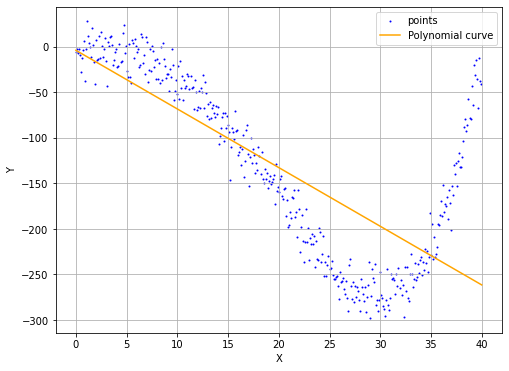

In [35]:
pr = PolynomialRegression(X, Y, lr=1e-4, n=1, max_epochs=100000)
pr.data_split()
pr.train()

polynomial of degree 2

Training loss = 3590

Epoch 1: Training loss = 27939.7022, Test loss = 9215.2222
Epoch 1001: Training loss = 7637.1982, Test loss = 5518.2518
Epoch 2001: Training loss = 7377.3262, Test loss = 5299.1760
Epoch 3001: Training loss = 7134.1698, Test loss = 5096.0800
Epoch 4001: Training loss = 6906.6531, Test loss = 4907.8733
Epoch 5001: Training loss = 6693.7694, Test loss = 4733.5377
Epoch 6001: Training loss = 6494.5768, Test loss = 4572.1222
Epoch 7001: Training loss = 6308.1940, Test loss = 4422.7393
Epoch 8001: Training loss = 6133.7965, Test loss = 4284.5602
Epoch 9001: Training loss = 5970.6127, Test loss = 4156.8114
Epoch 10001: Training loss = 5817.9209, Test loss = 4038.7706
Epoch 11001: Training loss = 5675.0456, Test loss = 3929.7640
Epoch 12001: Training loss = 5541.3551, Test loss = 3829.1627
Epoch 13001: Training loss = 5416.2581, Test loss = 3736.3796
Epoch 14001: Training loss = 5299.2014, Test loss = 3650.8672
Epoch 15001: Training loss = 5189.6675, Test loss = 3572.1146
Epoch 16001: Trainin

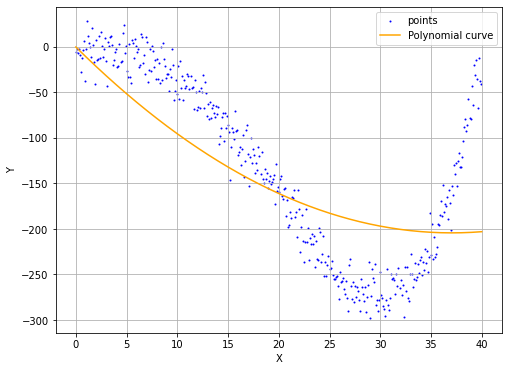

In [36]:
pr = PolynomialRegression(X, Y, lr=1e-6, n=2, max_epochs=100000)
pr.data_split()
pr.train()

polynomial of degree 3

Training loss = 1726

Epoch 1: Training loss = 27939.7022, Test loss = 10962.3746
Epoch 1001: Training loss = 11787.1884, Test loss = 8782.4319
Epoch 2001: Training loss = 11483.4719, Test loss = 8543.8532
Epoch 3001: Training loss = 11188.3980, Test loss = 8312.2892
Epoch 4001: Training loss = 10901.7208, Test loss = 8087.5370
Epoch 5001: Training loss = 10623.2014, Test loss = 7869.3998
Epoch 6001: Training loss = 10352.6076, Test loss = 7657.6859
Epoch 7001: Training loss = 10089.7140, Test loss = 7452.2097
Epoch 8001: Training loss = 9834.3013, Test loss = 7252.7905
Epoch 9001: Training loss = 9586.1566, Test loss = 7059.2529
Epoch 10001: Training loss = 9345.0733, Test loss = 6871.4266
Epoch 11001: Training loss = 9110.8502, Test loss = 6689.1461
Epoch 12001: Training loss = 8883.2923, Test loss = 6512.2508
Epoch 13001: Training loss = 8662.2097, Test loss = 6340.5846
Epoch 14001: Training loss = 8447.4183, Test loss = 6173.9958
Epoch 15001: Training loss = 8238.7391, Test loss = 6012.3372
Epoch 16001:

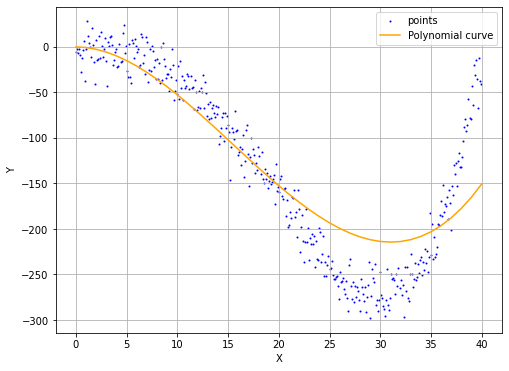

In [40]:
pr = PolynomialRegression(X, Y, lr=1e-9, n=3, max_epochs=100000)
pr.data_split()
pr.train()

polynomial of degree 4

Training loss = 249

Epoch 1: Training loss = 27939.7022, Test loss = 12202.0218
Epoch 1001: Training loss = 15282.1450, Test loss = 11347.6888
Epoch 2001: Training loss = 15003.1598, Test loss = 11145.3120
Epoch 3001: Training loss = 14729.3517, Test loss = 10946.6566
Epoch 4001: Training loss = 14460.6246, Test loss = 10751.6539
Epoch 5001: Training loss = 14196.8843, Test loss = 10560.2364
Epoch 6001: Training loss = 13938.0382, Test loss = 10372.3379
Epoch 7001: Training loss = 13683.9955, Test loss = 10187.8933
Epoch 8001: Training loss = 13434.6671, Test loss = 10006.8390
Epoch 9001: Training loss = 13189.9654, Test loss = 9829.1122
Epoch 10001: Training loss = 12949.8047, Test loss = 9654.6516
Epoch 11001: Training loss = 12714.1007, Test loss = 9483.3968
Epoch 12001: Training loss = 12482.7706, Test loss = 9315.2886
Epoch 13001: Training loss = 12255.7332, Test loss = 9150.2690
Epoch 14001: Training loss = 12032.9091, Test loss = 8988.2808
Epoch 15001: Training loss = 11814.2198, Test loss = 8829.2

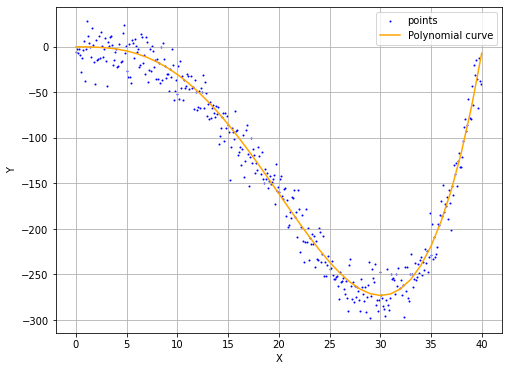

In [46]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=500000)
pr.data_split()
pr.train()

As we can see, the predicted polynomial with degree 4, has the min MSE and predicts the curve better.

### Check the overfitting effect for higher degrees 

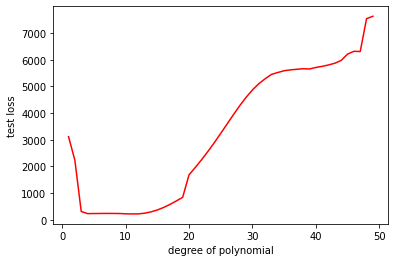

In [64]:
X1 = X.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.1, random_state=21)
test_vals = []
for degree in range(1, 50):
    polynomial_regression = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])

    # fit the model
    polynomial_regression.fit(x_train, y_train)

    # predict the model
    y_pred = polynomial_regression.predict(x_test)

    # calculate the test loss
    test_loss = mean_squared_error(y_test, y_pred)
    test_vals.append(test_loss)
    x_fit = np.linspace(min(X1), max(X1), 100).reshape(-1, 1)
    y_fit = polynomial_regression.predict(x_fit)

# show the test loss values for each degree of polynomials
x = [i for i in range(1, 50)]
plt.plot(x, test_vals, color='red', label='Test Loss')
plt.xlabel('degree of polynomial')
plt.ylabel('test loss')
plt.show()

As the curve of loss shows, for degrees 1 to 4, loss decreases, for degrees 4 to 12, loss is almost the same but from degree 12, how much we increase the degree, the loss becomes greather. It's the effect of overfitting. because data points are not as complex as predicted model.

### check for different values of test data

test size = 0.2

Epoch 200000: Training loss = 605.9863, Test loss = 581.2799


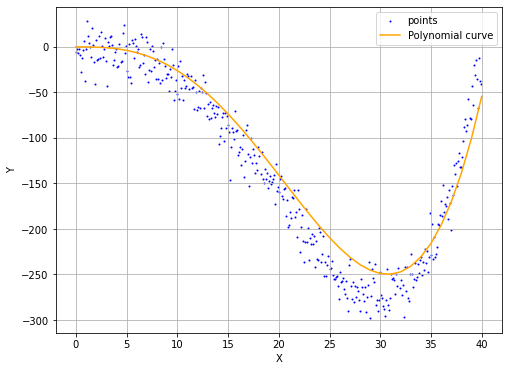

In [12]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.2)
pr.train()

test size = 0.3

Epoch 200000: Training loss = 577.1053, Test loss = 546.3951


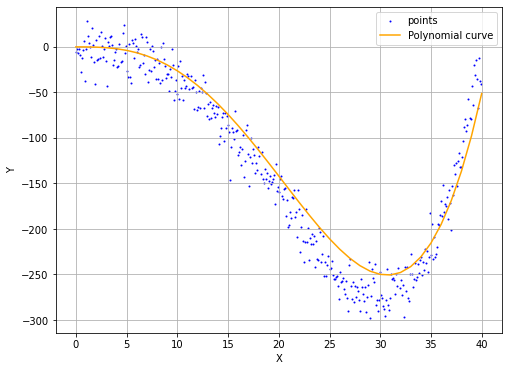

In [13]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.3)
pr.train()

test size = 0.4

Epoch 200000: Training loss = 563.8719, Test loss = 489.8061


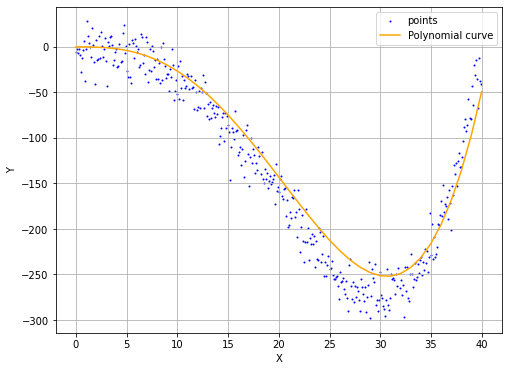

In [14]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.4)
pr.train()

test size = 0.5

Epoch 200000: Training loss = 535.0039, Test loss = 443.9345


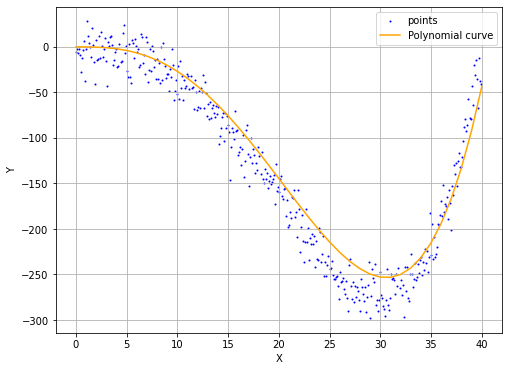

In [15]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.5)
pr.train()

test size = 0.6

Epoch 200000: Training loss = 514.1493, Test loss = 446.7086


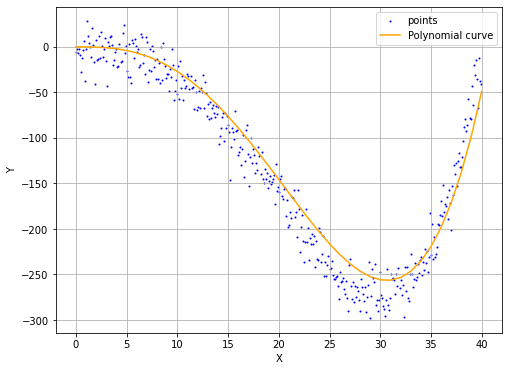

In [16]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.6)
pr.train()

test size = 0.7

Epoch 200000: Training loss = 488.1170, Test loss = 444.7599


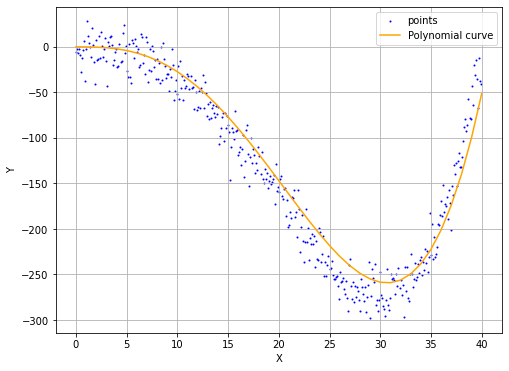

In [17]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.7)
pr.train()

test size = 0.8

Epoch 200000: Training loss = 445.2062, Test loss = 456.2388


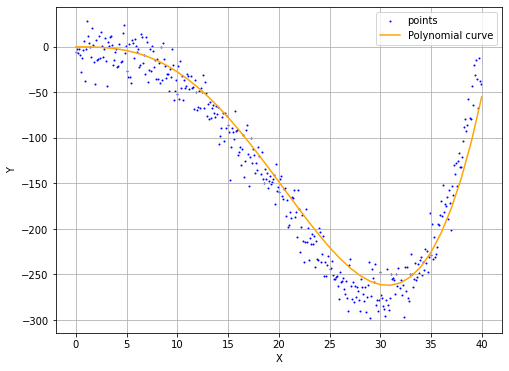

In [18]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.8)
pr.train()

test size = 0.9

Epoch 200000: Training loss = 351.5846, Test loss = 372.6853


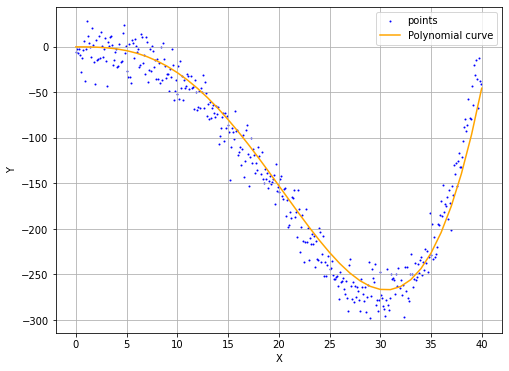

In [19]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, max_epochs=200000)
pr.data_split(test_size=0.9)
pr.train()

We can see, that with increasing the size of test data and decreasing the train data, the loss on train data decreases. Beacuse its easier to learn the pattern in smaller data size. But test loss may increase or decrease. It doesn't have a fixed pattern!

### Add regularization term to model

Epoch 1: Training loss = 27939.7022, Test loss = 12202.0218
Epoch 1001: Training loss = 15282.1450, Test loss = 11347.6888
Epoch 2001: Training loss = 15003.1598, Test loss = 11145.3120
Epoch 3001: Training loss = 14729.3517, Test loss = 10946.6566
Epoch 4001: Training loss = 14460.6246, Test loss = 10751.6540
Epoch 5001: Training loss = 14196.8843, Test loss = 10560.2365
Epoch 6001: Training loss = 13938.0383, Test loss = 10372.3380
Epoch 7001: Training loss = 13683.9956, Test loss = 10187.8935
Epoch 8001: Training loss = 13434.6672, Test loss = 10006.8392
Epoch 9001: Training loss = 13189.9656, Test loss = 9829.1124
Epoch 10001: Training loss = 12949.8050, Test loss = 9654.6519
Epoch 11001: Training loss = 12714.1010, Test loss = 9483.3971
Epoch 12001: Training loss = 12482.7709, Test loss = 9315.2890
Epoch 13001: Training loss = 12255.7337, Test loss = 9150.2694
Epoch 14001: Training loss = 12032.9096, Test loss = 8988.2813
Epoch 15001: Training loss = 11814.2204, Test loss = 8829.2

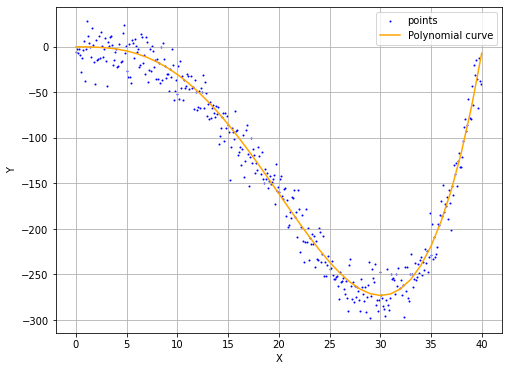

In [89]:
pr = PolynomialRegression(X, Y, lr=1e-12, n=4, rgulr=20, max_epochs=500000)
pr.data_split(test_size=0.1)
pr.train()

Adding rgularization for polynomial of degree 4 has no effect on train loss, because it doesn't encounter overfitting.

### regularization for higher degrees to check the overfitting effect

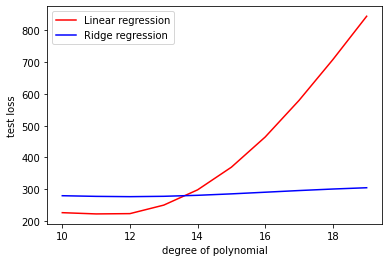

In [109]:
X1 = X.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.1, random_state=21)
test_vals = []
# train for linear regression
for degree in range(10, 20):
    polynomial_regression = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])

    # fit the model 
    polynomial_regression.fit(x_train, y_train)

    # predict the model
    y_pred = polynomial_regression.predict(x_test)

    # calculate the test loss
    test_loss = mean_squared_error(y_test, y_pred)
    test_vals.append(test_loss)
    x_fit = np.linspace(min(X1), max(X1), 100).reshape(-1, 1)
    y_fit = polynomial_regression.predict(x_fit)

test_vals2 = []
X2 = X.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.1, random_state=21)
# train for linear regression with adding ridge regularization
for degree in range(10, 20):
    polynomial_regression = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree)),
        ("standard_scaler", StandardScaler()),
        ("ridge_regression", Ridge(alpha=2.0))
    ])

    # fit the model 
    polynomial_regression.fit(x_train, y_train)

    # predict the model 
    y_pred = polynomial_regression.predict(x_test)

    # calculate the test loss
    test_loss = mean_squared_error(y_test, y_pred)
    test_vals2.append(test_loss)
    x_fit = np.linspace(min(X1), max(X1), 100).reshape(-1, 1)
    y_fit = polynomial_regression.predict(x_fit)

# show the test loss values for 2 models for each degree of polynomials
x = [i for i in range(10, 20)]
plt.plot(x, test_vals, color='red', label='Linear regression')
plt.plot(x, test_vals2, color='blue', label='Ridge regression')
plt.xlabel('degree of polynomial')
plt.ylabel('test loss')
plt.legend()
plt.show()

As we can see from the plot, it is obvious that by adding regularization, the effect of overfitting was removed and by increasing the degree of polynomial the loss won't increase much, but in normal regression, by increasing the degree from 13 up to 20, the overfitting effects the results a lot and train loss increases.